# importing the MLBox

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

/home/datageek/anaconda2/lib/python2.7/site-packages/mlbox/preprocessing/drift/__init__.py:9: UserWarning: ipCluster is starting. Please wait 30 sec and check in terminal that 'the engines appear to have started successfully'.
  warnings.warn("ipCluster is starting. Please wait 30 sec and check in terminal that 'the engines appear to have started successfully'.")
Using Theano backend.
/home/datageek/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
paths = ["train.csv","test.csv"]
target_name = "Survived"

# reading and cleaning all files 

In [3]:
rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)


reading csv : train.csv ...
cleaning data...
CPU time: 0.174474000931 seconds

reading csv : test.csv ...
cleaning data...
CPU time: 0.229666948318 seconds

number of common features : 11

gathering and crunching for train and test datasets
reindexing for train and test datasets
dropping training duplicates
dropping constant variables on training set

number of categorical features : 5
number of numerical features : 6
number of training samples : 891
number of test samples : 418

Top sparse features (% missing values on train set):
Cabin       77.1
Age         19.9
Embarked     0.2
dtype: float64

task : classification
0.0    549
1.0    342
Name: Survived, dtype: int64
encoding target


In [4]:
dft = Drift_thresholder()
df = dft.fit_transform(df)


computing drifts...
CPU time: 0.575435161591 seconds

Top 10 drifts

('PassengerId', 1.0)
('Name', 0.99704442935827498)
('Ticket', 0.84579063327276627)
('Cabin', 0.59550700418006364)
('Embarked', 0.53834737054254522)
('SibSp', 0.52134352316754273)
('Fare', 0.51744001298932041)
('Sex', 0.51694417436933204)
('Pclass', 0.51382143975575834)
('Parch', 0.50992009325888499)

deleted variables : ['Name', 'PassengerId', 'Ticket']

dumping drift coefficients into directory : save
drift coefficients dumped


# tuning

In [5]:
opt = Optimiser(scoring = 'accuracy', n_folds = 3)

In [6]:
opt.evaluate(None, df)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'max_depth': -1, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'min_child_samples': 10, 'boosting_type': 'gbdt'}


MEAN SCORE : accuracy = 0.808080808081
VARIANCE : 0.0119832528081 (fold 1 = 0.79797979798, fold 2 = 0.824915824916, fold 3 = 0.801346801347)
CPU time: 69.6431260109 seconds



0.80808080808080807

In [7]:
space = {
    
        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]}, 
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},    
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}
    
        }

best = opt.optimise(space, df,15)


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'threshold': 0.2561552394130463, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'max_depth': 6, 'boosting_type': 'gbdt'}



/home/datageek/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



MEAN SCORE : accuracy = 0.806958473625
VARIANCE : 0.0156323100754 (fold 1 = 0.791245791246, fold 2 = 0.828282828283, fold 3 = 0.801346801347)
CPU time: 63.3882591724 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'threshold': 0.20367342937470237, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'max_depth': 3, 'boosting_type': 'gbdt'}


MEAN SCORE : accuracy = 0.817059483726
VARIANCE : 0.0151


MEAN SCORE : accuracy = 0.802469135802
VARIANCE : 0.018713054995 (fold 1 = 0.784511784512, fold 2 = 0.828282828283, fold 3 = 0.794612794613)
CPU time: 59.3555259705 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'threshold': 0.17249692267304234, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'max_depth': 7, 'boosting_type': 'gbdt'}


MEAN SCORE : accuracy = 0.800224466891
VARIANCE : 0.0151


fitting the pipeline...
CPU time: 14.987842083 seconds

dumping feature importances into directory : save


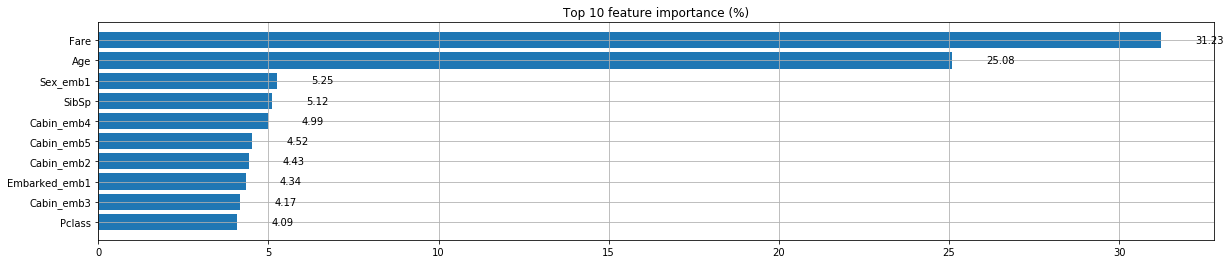


predicting...
CPU time: 0.0353481769562 seconds

top 10 predictions :

        0.0       1.0  Survived_predicted
0  0.927144  0.072856                   0
1  0.837486  0.162514                   0
2  0.957697  0.042303                   0
3  0.854883  0.145117                   0
4  0.668967  0.331033                   0
5  0.706484  0.293516                   0
6  0.523017  0.476983                   0
7  0.903631  0.096369                   0
8  0.205517  0.794483                   1
9  0.967299  0.032701                   0

dumping predictions into directory : save


<mlbox.prediction.predictor.Predictor instance at 0x7f94418970e0>

In [8]:
prd = Predictor()
prd.fit_predict(best, df)